## 1.  Define the Problem

### Medical Cost Personal Datasets
<b>Insurance Forecast by using Linear Regression</b><br>
The objective is to develop a predictive model that accurately forecasts individual medical insurance charges based on demographic and health information, using a dataset containing variables such as age, BMI, smoking status, and number of children.


 <ul><b>Dataset: </b>https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download</ul>

## 2. Collect & Read Data

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Data Cleaning 

#### i. checking for missing data

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### ii. checking for duplicates

In [7]:
dups = df.duplicated()

In [8]:
duplicates = df.duplicated(keep=False)
print("Duplicate Rows based on all columns:")
print(df[duplicates])

Duplicate Rows based on all columns:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
df = df.drop_duplicates()

#### iii. standardizing textual data

In [10]:
unique_values = df.select_dtypes(exclude=['number']).apply(pd.unique)
print(unique_values)

sex                                     [female, male]
smoker                                       [yes, no]
region    [southwest, southeast, northwest, northeast]
dtype: object


<b>'object':</b> Selects columns with object data types, typically strings or mixed types.<br>
'int64', 'float64', etc.: Selects columns of a specific data type. <br>
'bool': Selects boolean columns.<br>
'datetime' or 'datetime64': Selects datetime columns.<br>
'timedelta' or 'timedelta64': Selects timedelta columns, useful for durations.<br>
'category': Selects columns with categorical data.<br>

## 4. Data Exploration (EDA)
 

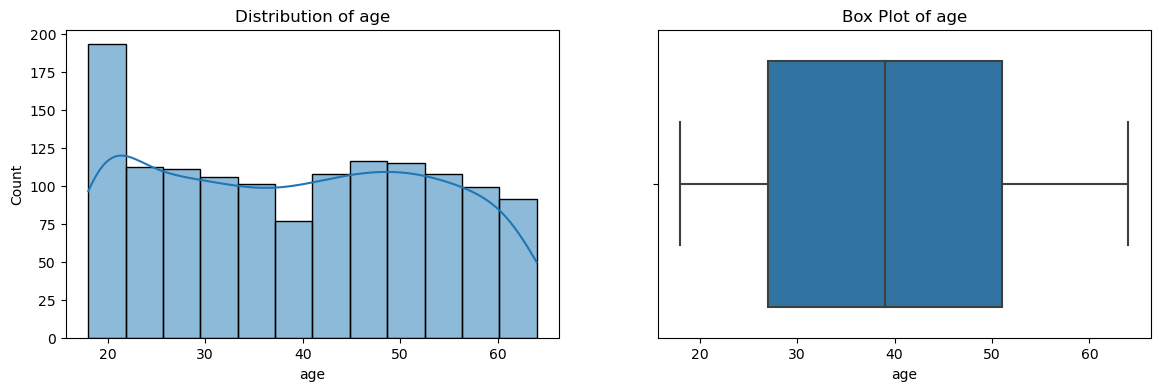

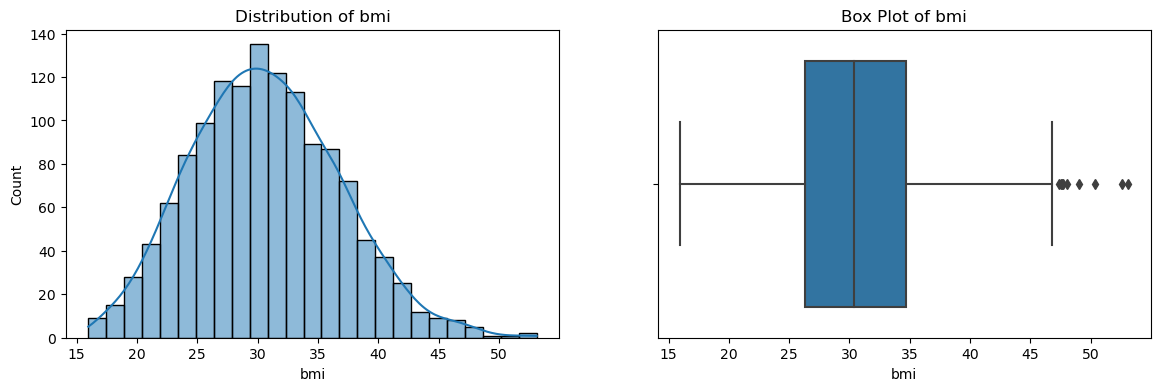

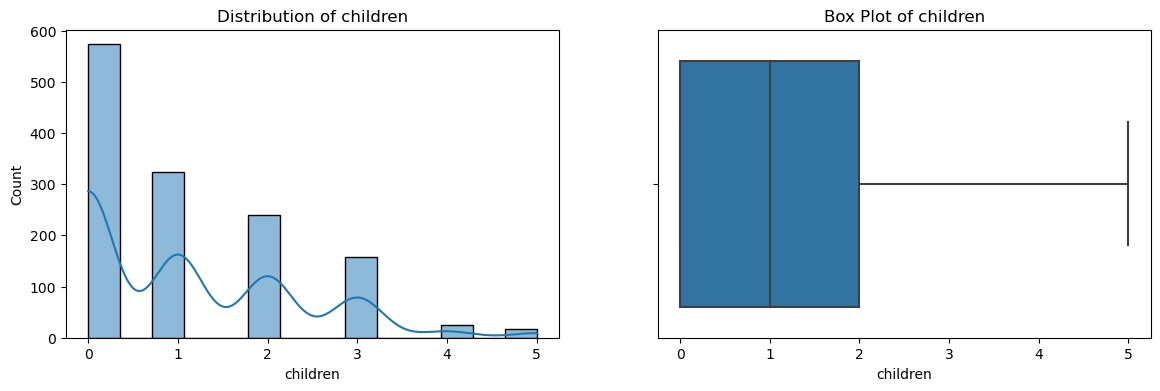

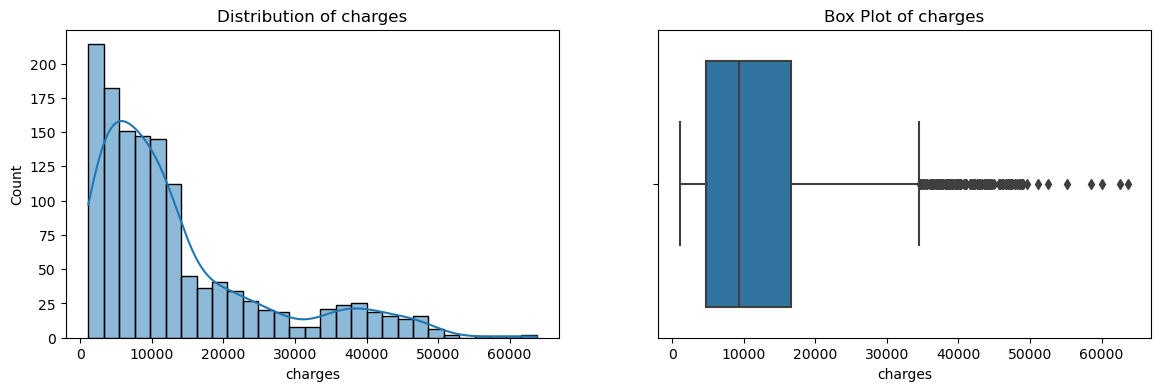

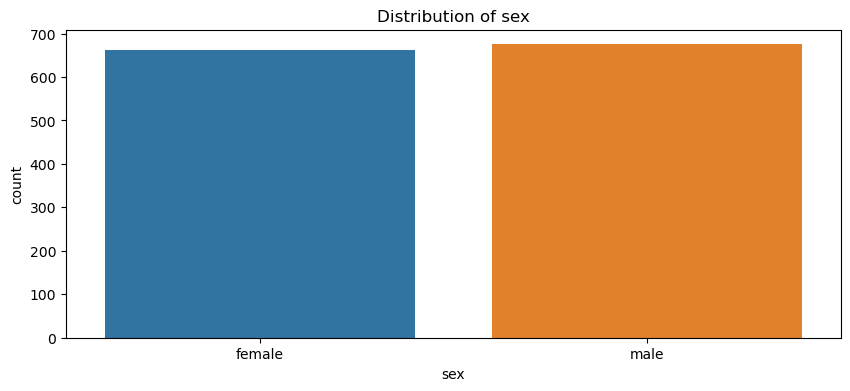

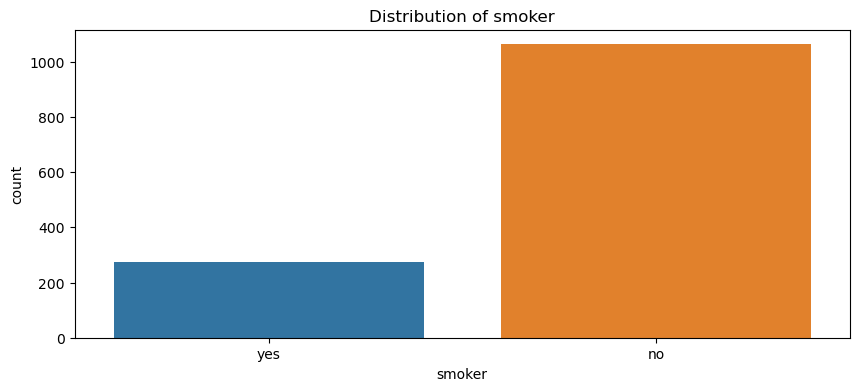

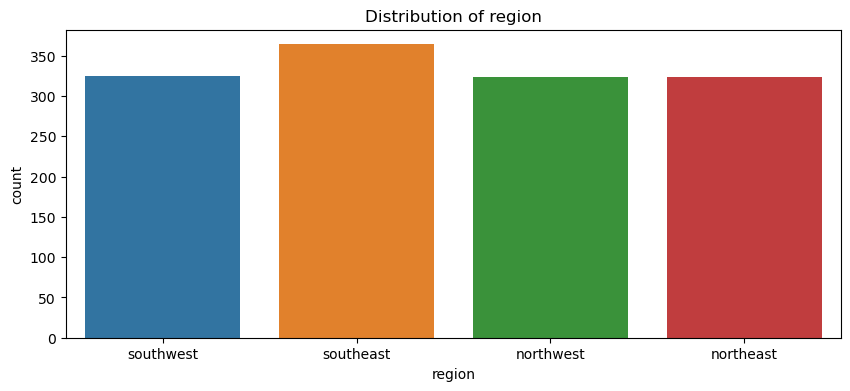

In [11]:
# Univariate analysis for numerical columns: histograms and boxplots
for column in df.select_dtypes(include='number').columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
    
    # Histogram
    sns.histplot(df[column], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribution of {column}')
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axs[1])
    axs[1].set_title(f'Box Plot of {column}')
    
    plt.show()

# Univariate analysis for categorical columns: count plots
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

### ANALYSIS 1

1. The <b>Age</b> distribution appears to be slightly left-skewed, indicating a younger demographic within the dataset.
2. The <b>BMI</b> distribution appears to be approximately normally distributed with a slight right skew, suggesting a few individuals with higher BMI values.
3. The <b>Children</b> distribution is positively skewed, with most individuals having fewer than 3 children, and a smaller number having 3 or more.
4. The distribution of <b>Charges</b> is highly right-skewed, indicating that most individuals have lower medical charges, with a few individuals incurring significantly higher charges.
5. The count plot for the <b>Sex</b> variable shows a nearly even distribution between females and males, indicating gender balance in the dataset.
6. The count plot for the <b>Smoker</b> variable shows that non-smokers significantly outnumber smokers in the dataset.

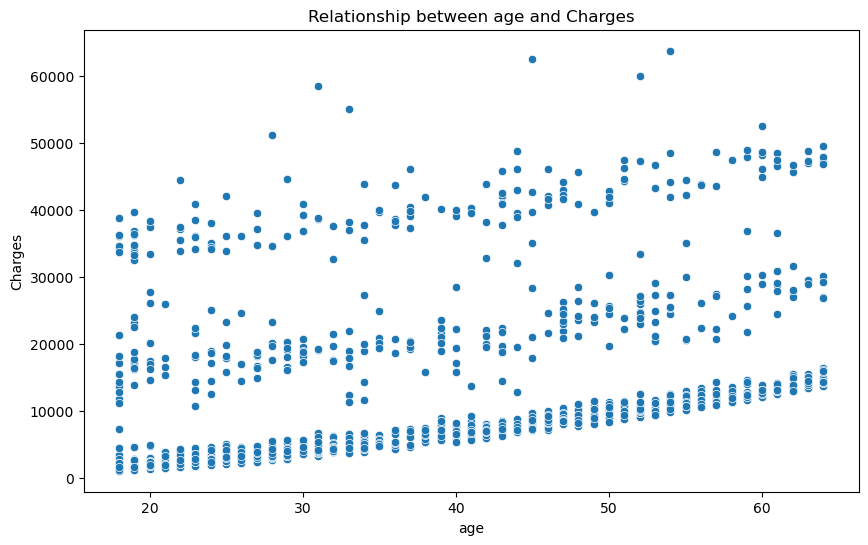

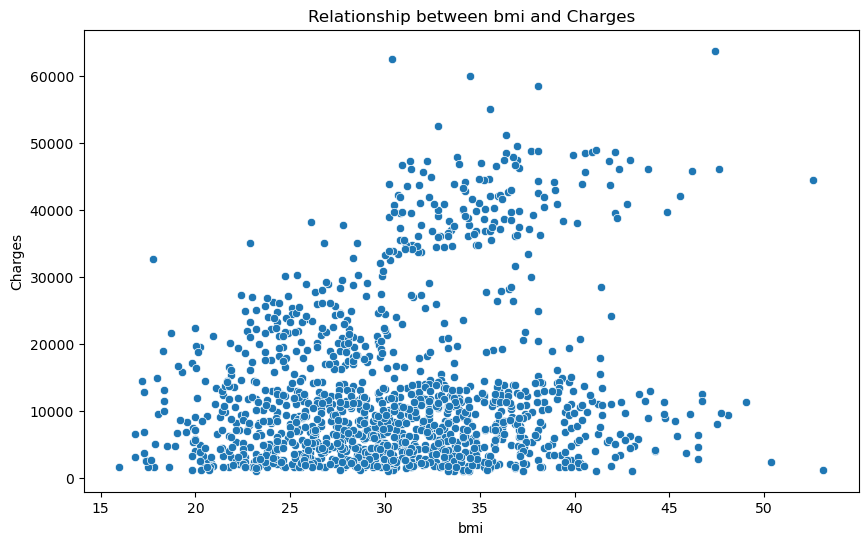

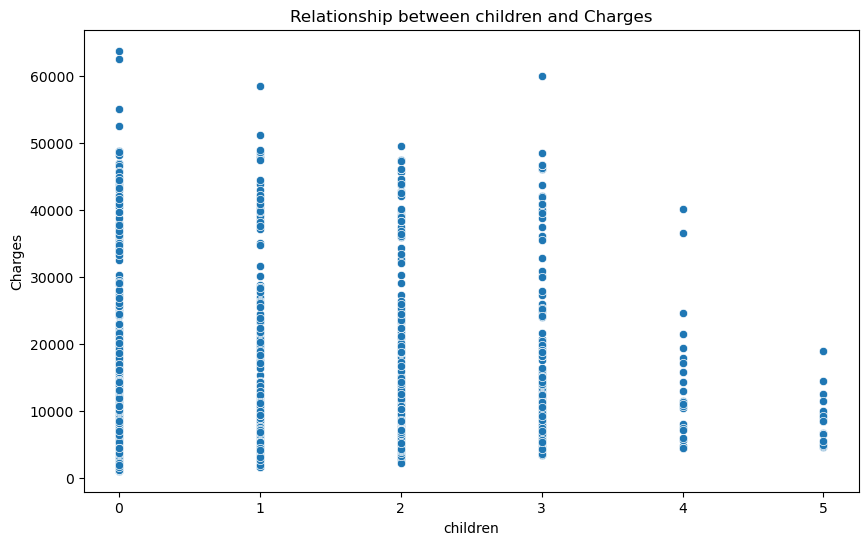

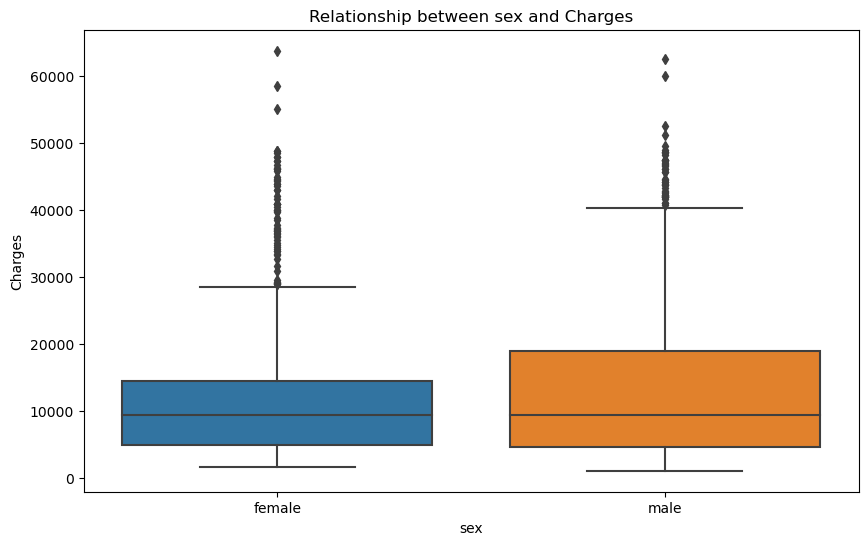

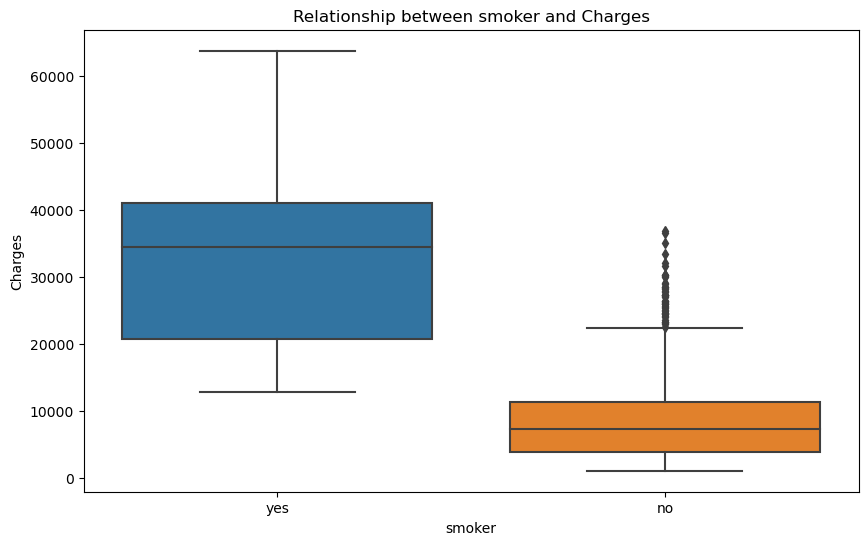

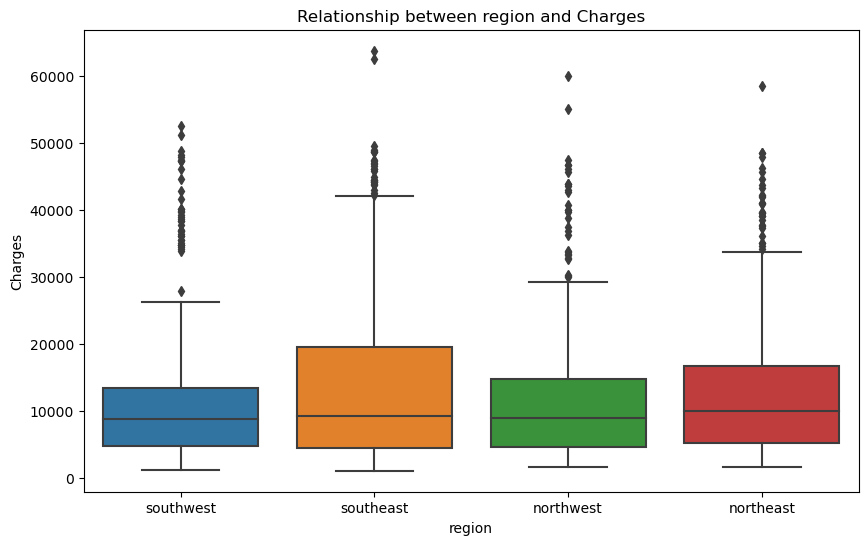

In [12]:
# Bivariate analysis for numerical variables with respect to 'charges'
for column in df.select_dtypes(include='number').columns.drop('charges'):  # excluding 'charges' itself
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column], y=df['charges'])
    plt.title(f'Relationship between {column} and Charges')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.show()

# Bivariate analysis for categorical variables with respect to 'charges'
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], y=df['charges'])
    plt.title(f'Relationship between {column} and Charges')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.show()

### ANALYSIS 2
##### Bivariate analysis (Age & Charges)
<ul> There is a trend indicating that charges increase with age. This is observable from the general upward trajectory of the data points as age increases.</ul>
<ul>The plot also shows three distinct bands or clusters. This could indicate that there are perhaps three different groups or policy types within the dataset that influence charges differently at each age level</ul>

##### Bivariate analysis (BMI & Charges)
<ul> The relationship between bmi and charges does not appear as straightforward as with age. The data points are more scattered, indicating a weaker linear relationship. </ul>

##### Bivariate analysis (Childern & Charges)
<ul>The scatter plot indicates that the number of children is not strongly correlated with insurance charges. The distribution of charges across the number of children is relatively even. </ul>

##### Bivariate analysis (Sex & Charges)
<ul>The median charges for males are slightly higher than for females, as seen by the median line in the boxes.</ul>

##### Bivariate analysis (Smoker & Charges)
<ul> There's a clear distinction between smokers and non-smokers in terms of medical charges. Smokers incur significantly higher charges on average compared to non-smokers. This is evident from the median of the two boxes and their respective IQRs.</ul>

##### Bivariate analysis (Region & Charges)
<ul>There does not appear to be a drastic difference in charges based on region, but there may be regional factors contributing to the higher costs seen in outliers, especially in the northeast. </ul>

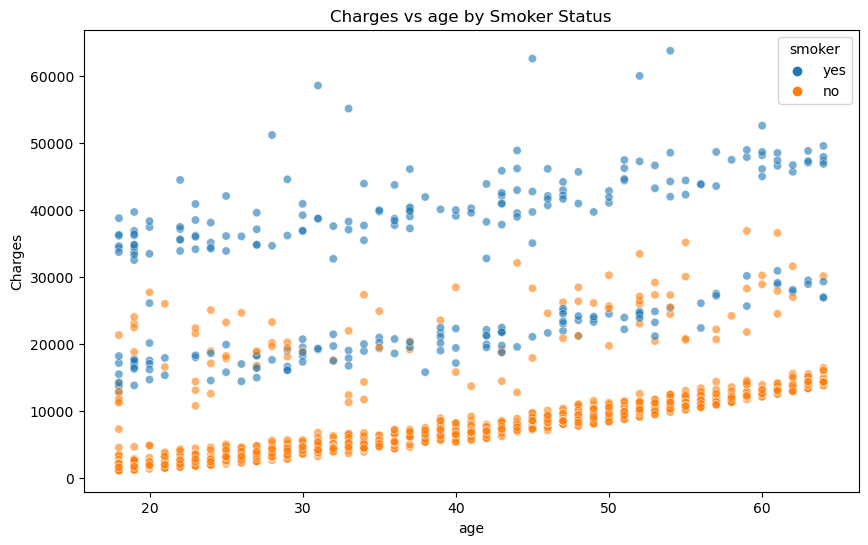

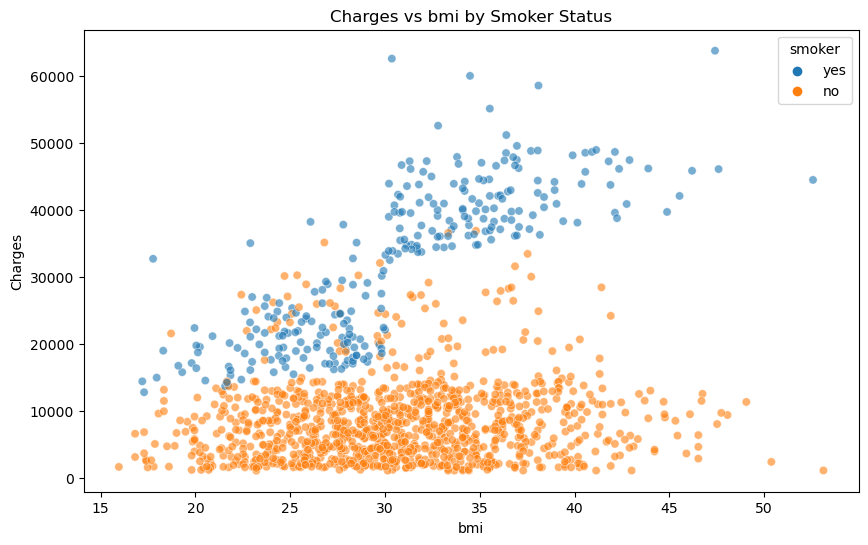

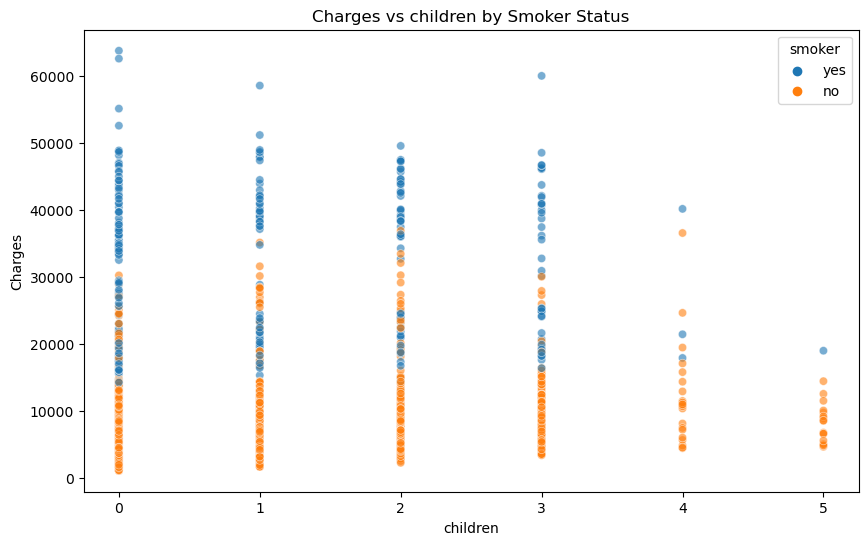

In [13]:
numerical_columns = df.select_dtypes(include='number').columns.drop('charges')  # Drop 'charges' to avoid plotting it against itself

# Scatter plots of 'charges' against numerical variables, color-coded by 'smoker'
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=column, y='charges', hue='smoker', alpha=0.6)
    plt.title(f'Charges vs {column} by Smoker Status')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.show()

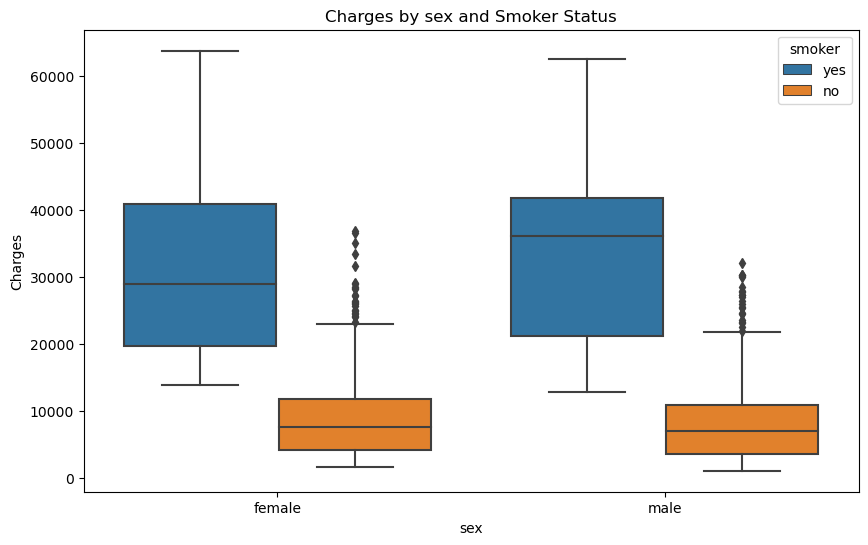

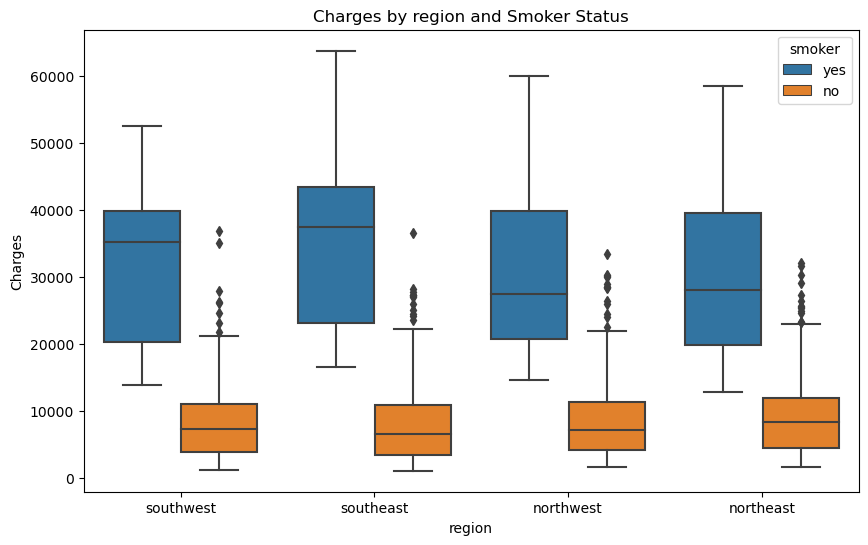

In [14]:
categorical_columns = df.select_dtypes(include='object').columns.drop('smoker')  # Drop 'smoker' to avoid redundant analysis

# Box plots of 'charges' for each category, separated by 'smoker' status
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, y='charges', hue='smoker')
    plt.title(f'Charges by {column} and Smoker Status')
    plt.xlabel(column)
    plt.ylabel('Charges')
    plt.show()

### MULTIVARIATE ANALYSIS

#### Charges vs Age by Smoker Status
<ul>The plot suggests that smoking status might be a strong predictor of medical charges, potentially more so than age.</ul>

#### Charges vs BMI by Smoker Status
<ul>There's a cluster of smokers with high BMI and very high medical charges, which may suggest an interaction effect between smoking and BMI on medical charges.</ul>

#### Charges by Sex and Smoker Status
<ul> Smokers incur significantly higher medical charges than non-smokers across both sexes, with the data indicating a larger variability in the amount charged to smokers.</ul>

#### Charges by Region and Smoker Status
<ul>Smoker status dramatically influences medical charges across all regions, with the Southeast showing notably higher median charges for smokers, suggesting regional differences in healthcare costs linked to smoking.</ul>


## 5. Feature Engineering

In [15]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

## 6. Data Preprocessing 

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Separate features and target variable
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'bmi', 'children']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


## 7. Choosing the Right Model

In [17]:
from sklearn.linear_model import LinearRegression

# Fit the linear regression model
model = LinearRegression()

## 8. Training the Model 

In [18]:
model.fit(X_train, y_train)

LinearRegression()

## 9. Model Evaluation

In [19]:
# Evaluate the model
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

# Print the scores
print(f"Training set score: {score_train}")
print(f"Test set score: {score_test}")

Training set score: 0.748860461829179
Test set score: 0.7530385567240128


# Model optimization

<ul> for model optimization we will define a model training and evaluating function so we can easily re-train the model after adjustments</ul>

In [20]:
def train_evaluate_linear_regression(df, target_column, numerical_columns):
    
    test_size=0.2
    random_state=0
    
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Standardize numerical features
    scaler = StandardScaler()
    X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
    X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    
    # Print the scores
    print(f"Training set score: {score_train}")
    print(f"Test set score: {score_test}")
    
    return score_train, score_test

In [28]:
target_column = 'charges'
numerical_columns = ['age', 'bmi', 'children']

## 10. Model Tuning

#### a. Feature Enginerring

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction term between 'bmi' and 'smoker_yes'
df_encoded['bmi_smoker_interaction'] = df_encoded['bmi'] * df_encoded['smoker_yes']

# Generate polynomial features for 'age'
poly = PolynomialFeatures(degree=3, include_bias=False)
age_poly = poly.fit_transform(df_encoded[['age']])
df_encoded['age_squared'] = age_poly[:, 1]  # Column 1 is 'age' squared
df_encoded['age_cubed'] = age_poly[:, 2]  # Column 2 is 'age' cubed


In [29]:
train_evaluate_linear_regression(df_encoded, target_column, numerical_columns)

Training set score: 0.8447115276558029
Test set score: 0.8353634340798841


(0.8447115276558029, 0.8353634340798841)